# import packages

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import glob
import re
import os
import sys
import astroscrappy
from astropy.io import fits
#sys.path.remove('/Users/gks/Dropbox/mypylib')
import astropy
import matplotlib.pyplot as plt
import astropy.io.fits 

In [2]:
sys.path.append('src/')
import filepath
import utils
filepath, utils

ModuleNotFoundError: No module named 'filepath'

In [31]:
class FitsImage(object):
    """
    A helper class when reading fits files. Depends on pyFits.
    """
    DIRLOC = ''
    def __init__(self,filename=None,data=None,header=None,imgnumber=0):
        if filename!=None:
            self.filename = filename
            self.hdulist = fits.open(self.filename)
            self.header = self.hdulist[imgnumber].header
            data = self.hdulist[imgnumber].data
            self.data = data.astype(float)
        else:
            self.filename = ""
            self.hdulist = None
            self.header = header
            self.data = data
    
    def remove_cosmics(self,
                       verbose=True,
                       fsmode='convolve',
                       save_cleaned=False,
                       savefolder=None,
                       save_suffix="_cleaned",
                       overwrite=False,
                       gain=1.,
                       psffwhm=16.,
                       psfsize=16,
                       sigclip=6.,
                       sigfrac=0.3,
                       objlim=5.,
                       psfmodel="gauss",
                       pssl=0.,
                       cleantype="medmask",
                       **cosmics_kwargs):
        """
        Remove cosmic rays with astroscrappy
        
        Main thing is to study how the results change with the different settings.
        
        Main parameters are: GAIN and psffwhm
        """
        if verbose: print("Cleaning cosmic rays")
        self.cosmics_mask, self.cosmics_cleaned_data = astroscrappy.detect_cosmics(self.data,
                                                                                   objlim=objlim,
                                                                                   sigfrac=sigfrac,
                                                                                   sigclip=sigclip,
                                                                                   psfsize=psfsize,
                                                                                   verbose=verbose,
                                                                                   gain=gain,
                                                                                   psffwhm=psffwhm,
                                                                                   fsmode=fsmode,
                                                                                   psfmodel=psfmodel,
                                                                                   pssl=pssl,
                                                                                   cleantype=cleantype,
                                                                                   **cosmics_kwargs)
        if save_cleaned:
            # Saving file
            fp = filepath.FilePath(self.filename)
            make_dir(savefolder)
            if savefolder is not None: 
                fp.directory = savefolder
            fp.add_suffix(save_suffix)
            self.cosmics_save_filename = fp._fullpath
            self.savefits(filename=self.cosmics_save_filename,
                          data=self.cosmics_cleaned_data.astype(np.int32),
                          verbose=verbose,
                          overwrite=overwrite)
    
    def savefits(self,data=None,filename="",suffix="",verbose=True,overwrite=True):
        if data is None:
            data = self.data
        if filename=="":
            fp = filepath.Filepath(self.filename)
            if suffix=="":
                suffix = "_out"
            fp.add_suffix(suffix)
            filename=fp._fullpath
        self.header["BITPIX"]=16
        self.header["BSCALE"]=1
        self.header["BZERO"]=32768
        fits.writeto(filename,
                     data=data,
                     header=self.header,
                     overwrite=overwrite,
                     output_verify="warn")
        if verbose: print("Saved to",filename)
            
def make_dir(dirname,verbose=True):
    """    Make a directory    """
    try:
        os.makedirs(dirname)
        if verbose==True: print("Created folder:",dirname)
    except OSError:
        if verbose==True: print(dirname,"already exists. Skipping")

# Find all of the files to clean

In [24]:
FOLDERNAME = os.path.abspath(r'''C:\Users\Marissa\Desktop\Research\Transits\10132020_TOI1696\20201014_ARCSAT\Calibrated_DomeFlat\CR_test''')
regex = "*.fits"
files = glob.glob(os.path.join(FOLDERNAME,regex))

In [25]:
files

['C:\\Users\\Marissa\\Desktop\\Research\\Transits\\10132020_TOI1696\\20201014_ARCSAT\\Calibrated_DomeFlat\\CR_test\\TOI1696_0.fits']

# Loop through all test files and clean

- This saves the files in a 0_CLEANED subdirectory in the FOLDERNAME
- appends a *_cleaned* to the filenames

In [255]:
for i, f in enumerate(files):
    print(i,f)
    fimg = FitsImage(f)
    fimg.remove_cosmics(save_cleaned=True,gain=1.,sepmed=True,overwrite=True,
        savefolder=os.path.join(FOLDERNAME,'0_CLEANED/'))

0 C:\Users\Marissa\Desktop\Research\Summer 2020\APO_Observing\20200904_Trappist1b\Q3NA01\UT200905\0_Science\0_outlier_test\0_bad_fits\Arctic_Fast_4x4_sdss_i_.0098.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
4387 cosmic pixels this iteration
Iteration 2:
4172 cosmic pixels this iteration
Iteration 3:
4168 cosmic pixels this iteration
Iteration 4:
4151 cosmic pixels this iteration
Created folder: C:\Users\Marissa\Desktop\Research\Summer 2020\APO_Observing\20200904_Trappist1b\Q3NA01\UT200905\0_Science\0_outlier_test\0_bad_fits\0_CLEANED/
Saved to C:\Users\Marissa\Desktop\Research\Summer 2020\APO_Observing\20200904_Trappist1b\Q3NA01\UT200905\0_Science\0_outlier_test\0_bad_fits\0_CLEANED/\Arctic_Fast_4x4_sdss_i_.0098_cleaned.fits
1 C:\Users\Marissa\Desktop\Research\Summer 2020\APO_Observing\20200904_Trappist1b\Q3NA01\UT200905\0_Science\0_outlier_test\0_bad_fits\Arctic_Fast_4x4_sdss_i_.0099.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
44

Starting 4 L.A.Cosmic iterations
Iteration 1:
4467 cosmic pixels this iteration
Iteration 2:
4238 cosmic pixels this iteration
Iteration 3:
4246 cosmic pixels this iteration
Iteration 4:
4242 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Summer 2020\APO_Observing\20200904_Trappist1b\Q3NA01\UT200905\0_Science\0_outlier_test\0_bad_fits\0_CLEANED/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Summer 2020\APO_Observing\20200904_Trappist1b\Q3NA01\UT200905\0_Science\0_outlier_test\0_bad_fits\0_CLEANED/\Arctic_Fast_4x4_sdss_i_.0395_cleaned.fits
12 C:\Users\Marissa\Desktop\Research\Summer 2020\APO_Observing\20200904_Trappist1b\Q3NA01\UT200905\0_Science\0_outlier_test\0_bad_fits\Arctic_Fast_4x4_sdss_i_.0439.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
4406 cosmic pixels this iteration
Iteration 2:
4147 cosmic pixels this iteration
Iteration 3:
4119 cosmic pixels this iteration
Iteration 4:
4108 cosmic pixels this iteration
C:\Use

4454 cosmic pixels this iteration
Iteration 2:
4251 cosmic pixels this iteration
Iteration 3:
4259 cosmic pixels this iteration
Iteration 4:
4231 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Summer 2020\APO_Observing\20200904_Trappist1b\Q3NA01\UT200905\0_Science\0_outlier_test\0_bad_fits\0_CLEANED/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Summer 2020\APO_Observing\20200904_Trappist1b\Q3NA01\UT200905\0_Science\0_outlier_test\0_bad_fits\0_CLEANED/\Arctic_Fast_4x4_sdss_i_.0506_cleaned.fits
23 C:\Users\Marissa\Desktop\Research\Summer 2020\APO_Observing\20200904_Trappist1b\Q3NA01\UT200905\0_Science\0_outlier_test\0_bad_fits\Arctic_Fast_4x4_sdss_i_.0508.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
5213 cosmic pixels this iteration
Iteration 2:
4631 cosmic pixels this iteration
Iteration 3:
4354 cosmic pixels this iteration
Iteration 4:
4245 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Summer 2020\APO_Ob

Starting 4 L.A.Cosmic iterations
Iteration 1:
4381 cosmic pixels this iteration
Iteration 2:
4183 cosmic pixels this iteration
Iteration 3:
4187 cosmic pixels this iteration
Iteration 4:
4168 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Summer 2020\APO_Observing\20200904_Trappist1b\Q3NA01\UT200905\0_Science\0_outlier_test\0_bad_fits\0_CLEANED/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Summer 2020\APO_Observing\20200904_Trappist1b\Q3NA01\UT200905\0_Science\0_outlier_test\0_bad_fits\0_CLEANED/\Arctic_Fast_4x4_sdss_i_.0533_cleaned.fits
34 C:\Users\Marissa\Desktop\Research\Summer 2020\APO_Observing\20200904_Trappist1b\Q3NA01\UT200905\0_Science\0_outlier_test\0_bad_fits\Arctic_Fast_4x4_sdss_i_.0540.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
4431 cosmic pixels this iteration
Iteration 2:
4201 cosmic pixels this iteration
Iteration 3:
4185 cosmic pixels this iteration
Iteration 4:
4173 cosmic pixels this iteration
C:\Use

# ARCSAT, 20201014 TOI-1696

In [ ]:
for i, f in enumerate(files):
    print(i,f)
    fimg = FitsImage(f)
    fimg.remove_cosmics(save_cleaned=True,
                        gain=1.,
                        sepmed=True,
                        overwrite=False,
                        psffwhm=14.,
                        psfsize=14,
        savefolder=os.path.join(FOLDERNAME,'0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/'))

0 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0084.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
4824 cosmic pixels this iteration
Iteration 2:
4231 cosmic pixels this iteration
Iteration 3:
4126 cosmic pixels this iteration
Iteration 4:
4100 cosmic pixels this iteration
Created folder: C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/
Saved to C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/\k2_25b_sdssi_.0084_cleaned.fits
1 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0085.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
4935 cosmic pixels this iteration
Iteration 2:
4196 cosmic pixels this iteration
Iteration 3:
4122 cosmic pixels this iteration
Iteration 4:
4108 cosmic pixels this iteration
C:\Users\Marissa\

Starting 4 L.A.Cosmic iterations
Iteration 1:
4975 cosmic pixels this iteration
Iteration 2:
4104 cosmic pixels this iteration
Iteration 3:
4091 cosmic pixels this iteration
Iteration 4:
4086 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/\k2_25b_sdssi_.0097_cleaned.fits
14 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0098.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
4977 cosmic pixels this iteration
Iteration 2:
4113 cosmic pixels this iteration
Iteration 3:
4100 cosmic pixels this iteration
Iteration 4:
4095 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ alrea

4929 cosmic pixels this iteration
Iteration 2:
3847 cosmic pixels this iteration
Iteration 3:
3533 cosmic pixels this iteration
Iteration 4:
3459 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/\k2_25b_sdssi_.0110_cleaned.fits
27 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0111.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
4962 cosmic pixels this iteration
Iteration 2:
3811 cosmic pixels this iteration
Iteration 3:
3351 cosmic pixels this iteration
Iteration 4:
3236 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\

Starting 4 L.A.Cosmic iterations
Iteration 1:
3711 cosmic pixels this iteration
Iteration 2:
2252 cosmic pixels this iteration
Iteration 3:
1786 cosmic pixels this iteration
Iteration 4:
1279 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/\k2_25b_sdssi_.0123_cleaned.fits
40 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0124.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
3616 cosmic pixels this iteration
Iteration 2:
2185 cosmic pixels this iteration
Iteration 3:
1819 cosmic pixels this iteration
Iteration 4:
1329 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ alrea

Starting 4 L.A.Cosmic iterations
Iteration 1:
2931 cosmic pixels this iteration
Iteration 2:
1409 cosmic pixels this iteration
Iteration 3:
1374 cosmic pixels this iteration
Iteration 4:
1153 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/\k2_25b_sdssi_.0136_cleaned.fits
53 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0137.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
2871 cosmic pixels this iteration
Iteration 2:
1362 cosmic pixels this iteration
Iteration 3:
1314 cosmic pixels this iteration
Iteration 4:
1190 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ alrea

Starting 4 L.A.Cosmic iterations
Iteration 1:
2222 cosmic pixels this iteration
Iteration 2:
646 cosmic pixels this iteration
Iteration 3:
706 cosmic pixels this iteration
Iteration 4:
707 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/\k2_25b_sdssi_.0149_cleaned.fits
66 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0150.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
2267 cosmic pixels this iteration
Iteration 2:
827 cosmic pixels this iteration
Iteration 3:
907 cosmic pixels this iteration
Iteration 4:
855 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exi

2488 cosmic pixels this iteration
Iteration 2:
1017 cosmic pixels this iteration
Iteration 3:
1086 cosmic pixels this iteration
Iteration 4:
1001 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/\k2_25b_sdssi_.0162_cleaned.fits
79 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0163.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
2622 cosmic pixels this iteration
Iteration 2:
1084 cosmic pixels this iteration
Iteration 3:
1087 cosmic pixels this iteration
Iteration 4:
988 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\D

2111 cosmic pixels this iteration
Iteration 2:
704 cosmic pixels this iteration
Iteration 3:
765 cosmic pixels this iteration
Iteration 4:
713 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/\k2_25b_sdssi_.0175_cleaned.fits
92 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0176.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
1828 cosmic pixels this iteration
Iteration 2:
403 cosmic pixels this iteration
Iteration 3:
467 cosmic pixels this iteration
Iteration 4:
497 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Deskto

2030 cosmic pixels this iteration
Iteration 2:
631 cosmic pixels this iteration
Iteration 3:
690 cosmic pixels this iteration
Iteration 4:
707 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/\k2_25b_sdssi_.0188_cleaned.fits
105 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0189.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
1886 cosmic pixels this iteration
Iteration 2:
510 cosmic pixels this iteration
Iteration 3:
567 cosmic pixels this iteration
Iteration 4:
571 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Deskt

Starting 4 L.A.Cosmic iterations
Iteration 1:
1870 cosmic pixels this iteration
Iteration 2:
508 cosmic pixels this iteration
Iteration 3:
559 cosmic pixels this iteration
Iteration 4:
558 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/\k2_25b_sdssi_.0201_cleaned.fits
118 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0202.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
1796 cosmic pixels this iteration
Iteration 2:
444 cosmic pixels this iteration
Iteration 3:
510 cosmic pixels this iteration
Iteration 4:
516 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already ex

Starting 4 L.A.Cosmic iterations
Iteration 1:
1229 cosmic pixels this iteration
Iteration 2:
112 cosmic pixels this iteration
Iteration 3:
122 cosmic pixels this iteration
Iteration 4:
133 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/\k2_25b_sdssi_.0214_cleaned.fits
131 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0215.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
1173 cosmic pixels this iteration
Iteration 2:
100 cosmic pixels this iteration
Iteration 3:
111 cosmic pixels this iteration
Iteration 4:
119 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already ex

Starting 4 L.A.Cosmic iterations
Iteration 1:
1385 cosmic pixels this iteration
Iteration 2:
188 cosmic pixels this iteration
Iteration 3:
213 cosmic pixels this iteration
Iteration 4:
222 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/\k2_25b_sdssi_.0227_cleaned.fits
144 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0228.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
1377 cosmic pixels this iteration
Iteration 2:
186 cosmic pixels this iteration
Iteration 3:
208 cosmic pixels this iteration
Iteration 4:
219 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already ex

Starting 4 L.A.Cosmic iterations
Iteration 1:
1503 cosmic pixels this iteration
Iteration 2:
203 cosmic pixels this iteration
Iteration 3:
222 cosmic pixels this iteration
Iteration 4:
235 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/\k2_25b_sdssi_.0240_cleaned.fits
157 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0241.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
1401 cosmic pixels this iteration
Iteration 2:
190 cosmic pixels this iteration
Iteration 3:
201 cosmic pixels this iteration
Iteration 4:
225 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already ex

Starting 4 L.A.Cosmic iterations
Iteration 1:
1170 cosmic pixels this iteration
Iteration 2:
89 cosmic pixels this iteration
Iteration 3:
102 cosmic pixels this iteration
Iteration 4:
103 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/\k2_25b_sdssi_.0253_cleaned.fits
170 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0254.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
1208 cosmic pixels this iteration
Iteration 2:
75 cosmic pixels this iteration
Iteration 3:
79 cosmic pixels this iteration
Iteration 4:
89 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists

Starting 4 L.A.Cosmic iterations
Iteration 1:
1209 cosmic pixels this iteration
Iteration 2:
103 cosmic pixels this iteration
Iteration 3:
109 cosmic pixels this iteration
Iteration 4:
118 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/\k2_25b_sdssi_.0266_cleaned.fits
183 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0267.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
1213 cosmic pixels this iteration
Iteration 2:
96 cosmic pixels this iteration
Iteration 3:
101 cosmic pixels this iteration
Iteration 4:
107 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exi

Starting 4 L.A.Cosmic iterations
Iteration 1:
1157 cosmic pixels this iteration
Iteration 2:
75 cosmic pixels this iteration
Iteration 3:
94 cosmic pixels this iteration
Iteration 4:
104 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/\k2_25b_sdssi_.0279_cleaned.fits
196 C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\k2_25b_sdssi_.0280.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
1280 cosmic pixels this iteration
Iteration 2:
110 cosmic pixels this iteration
Iteration 3:
126 cosmic pixels this iteration
Iteration 4:
146 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190125\0_SCIENCE\0_CLEANED_gain_1_sepmed_T_psffwhm_14_psfsize_14/ already exis

Starting 4 L.A.Cosmic iterations
Iteration 1:
1381 cosmic pixels this iteration
Iteration 2:
168 cosmic pixels this iteration
Iteration 3:


In [15]:
str(files[0])

'C:\\Users\\Marissa\\Desktop\\Research\\Summer 2020\\APO_Observing\\20200904_Trappist1b\\Q3NA01\\UT200905\\0_Science\\0_outlier_test\\0_bad_fits\\Arctic_Fast_4x4_sdss_i_.0098.fits'

In [43]:
''.join(re.findall("Arctic_Fast_4x4_sdss_i_.(\d+).fits",files[0]))

'0098'

In [298]:


data = astropy.io.fits.getdata(files[0])

In [300]:
data

array([[ 671,  642, 1924, ..., 1967,  575,  601],
       [ 629,  610, 1965, ..., 2019,  565,  585],
       [ 623,  612, 1980, ..., 1974,  574,  591],
       ...,
       [ 659,  650, 1783, ..., 2002,  642,  653],
       [ 657,  643, 1821, ..., 1989,  632,  655],
       [ 695,  673, 1775, ..., 1911,  657,  679]], dtype=uint16)

k =2
j =2
0 C:\Users\Marissa\Desktop\Research\Transits\10132020_TOI1696\20201014_ARCSAT\Calibrated_DomeFlat\CR_test\TOI1696_0.fits
Cleaning cosmic rays
Starting 4 L.A.Cosmic iterations
Iteration 1:
1866 cosmic pixels this iteration
Iteration 2:
89 cosmic pixels this iteration
Iteration 3:
112 cosmic pixels this iteration
Iteration 4:
102 cosmic pixels this iteration
C:\Users\Marissa\Desktop\Research\Transits\10132020_TOI1696\20201014_ARCSAT\Calibrated_DomeFlat\CR_test\0_CLEANED_SYSTEMATIC_TESTS/ already exists. Skipping
Saved to C:\Users\Marissa\Desktop\Research\Transits\10132020_TOI1696\20201014_ARCSAT\Calibrated_DomeFlat\CR_test\0_CLEANED_SYSTEMATIC_TESTS/\TOI1696_0_delta_cleaned_gain_1_sepmed_T_psffwhm_2_psfsize_2.fits


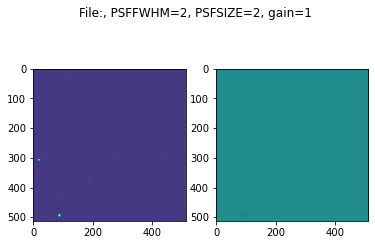

In [32]:
psffwhms = [2]
psfsizes = [2]




for k in psffwhms:
    for j in psfsizes:
        print("k ="+str(k))
        print("j ="+str(j))
        for i, f in enumerate(files):
            print(i,f)
            fimg = FitsImage(f)
            data_uncleaned=np.copy(fimg.data)
            fimg.remove_cosmics(save_cleaned=True,
                                    gain=1, #gain needs to be changed in 4 locations for filenames
                                    sepmed=True,
                                    overwrite=True,
                                    psffwhm=k,
                                    psfsize=j,
                                    save_suffix='_delta_cleaned_gain_1_sepmed_T_psffwhm_'+str(k)+'_psfsize_'+str(j),
                                    savefolder=os.path.join(FOLDERNAME,'0_CLEANED_SYSTEMATIC_TESTS/'))
            data_cleaned = fimg.cosmics_cleaned_data
            data_delta = data_uncleaned-data_cleaned
            fig, axx = plt.subplots(ncols=2,nrows=1)
            axx.flatten()[0].imshow(data_cleaned[0:1000,0:1000])
            axx.flatten()[1].imshow(data_delta[0:1000,0:1000])
            fig.suptitle('File:'+ str(''.join(re.findall("TOI_1696_.(\d+).fits",files[i])))+', PSFFWHM='+str(k)+', PSFSIZE='+str(j) + ', gain=1')
            #fig.savefig(r'''C:\Users\Marissa\Desktop\Research\Summer 2020\APO_Observing\20200904_Trappist1b\Q3NA01\UT200905\0_Science\0_outlier_test\all_outliers\0_CLEANED_SYSTEMATIC_TESTS\UT20200905_cleaned_gain_1_sepmed_T_psffwhm_'''+str(k)+'_psfsize_'+str(j)+'_'+str(''.join(re.findall("Arctic_Fast_4x4_sdss_i_.(\d+).fits",files[i])))+'.png',dpi=200)

                      

In [259]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

In [8]:
FOLDERNAME = os.path.abspath(r'''C:\Users\Marissa\Desktop\Research\Summer 2020\APO_Observing\20200904_Trappist1b\Q3NA01\UT200905\0_Science\0_outlier_test\0_bad_fits\0_CLEANED_SYSTEMATIC_TESTS''')
regex = "*.fits"
files_corrected = glob.glob(os.path.join(FOLDERNAME,regex))

In [9]:
files_corrected

['C:\\Users\\Marissa\\Desktop\\Research\\Summer 2020\\APO_Observing\\20200904_Trappist1b\\Q3NA01\\UT200905\\0_Science\\0_outlier_test\\0_bad_fits\\0_CLEANED_SYSTEMATIC_TESTS\\Arctic_Fast_4x4_sdss_i_.0098_delta_cleaned_gain_1_sepmed_T_psffwhm_10_psfsize_10.fits',
 'C:\\Users\\Marissa\\Desktop\\Research\\Summer 2020\\APO_Observing\\20200904_Trappist1b\\Q3NA01\\UT200905\\0_Science\\0_outlier_test\\0_bad_fits\\0_CLEANED_SYSTEMATIC_TESTS\\Arctic_Fast_4x4_sdss_i_.0099_delta_cleaned_gain_1_sepmed_T_psffwhm_10_psfsize_10.fits',
 'C:\\Users\\Marissa\\Desktop\\Research\\Summer 2020\\APO_Observing\\20200904_Trappist1b\\Q3NA01\\UT200905\\0_Science\\0_outlier_test\\0_bad_fits\\0_CLEANED_SYSTEMATIC_TESTS\\Arctic_Fast_4x4_sdss_i_.0100_delta_cleaned_gain_1_sepmed_T_psffwhm_10_psfsize_10.fits',
 'C:\\Users\\Marissa\\Desktop\\Research\\Summer 2020\\APO_Observing\\20200904_Trappist1b\\Q3NA01\\UT200905\\0_Science\\0_outlier_test\\0_bad_fits\\0_CLEANED_SYSTEMATIC_TESTS\\Arctic_Fast_4x4_sdss_i_.0102_delta_c

Text(0.5, 0.98, 'Reference Star')

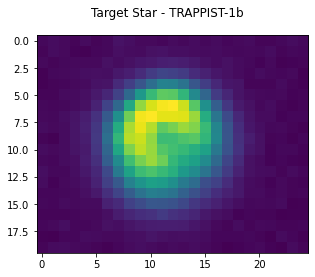

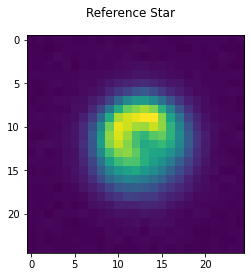

In [301]:
import matplotlib.pyplot as plt
%matplotlib inline

data = astropy.io.fits.getdata(files_corrected[0])
fig, ax = plt.subplots(ncols=1)
fig2, ax2 = plt.subplots(ncols=1)
ax.imshow(data[380:400,305:330]) #First two numbers are y-axis, second are x-axis
ax2.imshow(data[445:470,140:165]) #First two numbers are y-axis, second are x-axis
fig.suptitle('Target Star - TRAPPIST-1b')
fig2.suptitle('Reference Star')

#fig.savefig(r'''\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190118\0_SCIENCE\0_badfits\above\0_CLEANED_SYSTEMATIC_TESTS\Original_UT20190118.png''',dpi=200)


In [ ]:
path=r'''\Users\Marissa\Desktop\Research\Transits\k2-25b\APO\UT190118\0_SCIENCE\0_badfits\above\0_CLEANED_SYSTEMATIC_TESTS'''
fileList = []
for file in os.listdir(path):
    if file.startswith(r'''\UT20190118'''):
        complete_path = path + file
        fileList.append(complete_path)
for im in fileList:
    writer.append_data(imageio.imread(im))
writer.close()

writer = imageio.get_writer(path+'\test.mp4', fps=200)

